## PyTorch derivatives basics

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

from sklearn.model_selection import train_test_split
from torch.utils.data import random_split, DataLoader
from torchvision.datasets import MNIST, FashionMNIST
from torchvision.utils import make_grid

In [2]:
x = torch.tensor([ 1., 2. ]) 

In [3]:
y = torch.tensor([ 4., 5. ]) 

In [4]:
z = torch.tensor([ 7., 3. ]) 

In [5]:
x.requires_grad 

False

In [6]:
(x + y).requires_grad 

False

In [7]:
z.requires_grad = True

Результат операцій з тензорами має значення цього флагу `True`, якщо будь-який з операндів має встановлений флаг `True`

In [8]:
(x + z).requires_grad

True

In [9]:
x = torch.tensor([1., 10.]) 

In [10]:
x.requires_grad = True 

Градієнт може бути обрахований лише для тензорів, що містять числа з плаваючою комою (floating point numbers)

In [11]:
x = torch.tensor([1, 10]) 

In [12]:
x.requires_grad = True

RuntimeError: only Tensors of floating point and complex dtype can require gradients

Метод `requires_grad_(value = True)` також може встановлювати значення флагу для тензора.

In [13]:
x = torch.tensor([1., 10.]) 

In [14]:
x.requires_grad_()

tensor([ 1., 10.], requires_grad=True)

`torch.autograd.grad` function

In [15]:
t = torch.tensor([1., 2., 4.]).requires_grad_() 

In [16]:
u = torch.tensor([10., 20.]).requires_grad_() 

In [17]:
a = t.pow(2).sum() + u.log().sum() 

In [18]:
torch.autograd.grad(a, (t, u)) 

(tensor([2., 4., 8.]), tensor([0.1000, 0.0500]))

Метод `backward()` тензора акумулює градієнти всіх його тензорів, які не є результатами операцій, тобто листками в обрахованому графі. Та записує градієнти в `grad` властивість обʼєкта.

In [19]:
x = torch.tensor([ -3., 2., 5. ]).requires_grad_()

In [20]:
u = x.pow(3).sum()

In [21]:
x.grad 

In [22]:
u.backward()

In [23]:
x.grad

tensor([27., 12., 75.])

Метод є альтернативою до функції `torch.autograd.grad(…)` і є стандартом для тренування моделей.

Приклад побудови наступного графу і роботи з його градієнтом

![Example from the lection](./graph.png)

In [24]:
w1 = torch.rand(5, 5).requires_grad_() 

In [25]:
w2 = torch.rand(5, 5).requires_grad_()

In [26]:
x = torch.randn(5)

In [27]:
x0 = x

In [28]:
x1 = w1 @ x0

In [29]:
x2 = x0 + w2 @ x1

In [30]:
x3 = w1 @ (x1 + x2)

In [31]:
q = x3.norm()

In [32]:
q.backward()

In [33]:
q.grad

/var/folders/8p/sj6ncwq12_z6dgkmp_9c7llc0000gn/T/ipykernel_25445/920738494.py:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/build/aten/src/ATen/core/TensorBody.h:491.)
  q.grad


In [34]:
w1.grad

tensor([[ 0.1531,  5.0040,  6.1378,  2.5811, -2.9712],
        [-0.5282,  4.4944,  6.4090,  1.8439, -3.7224],
        [-0.0398,  4.8437,  6.1943,  2.3645, -3.1736],
        [ 0.0228,  6.4406,  8.1345,  3.1979, -4.1001],
        [-0.5497,  6.4539,  8.9220,  2.7965, -5.0147]])

In [35]:
x0.grad

In [36]:
x1.grad

/var/folders/8p/sj6ncwq12_z6dgkmp_9c7llc0000gn/T/ipykernel_25445/4288832461.py:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/build/aten/src/ATen/core/TensorBody.h:491.)
  x1.grad


Менеджер контексту `torch.no_grad()` вимикає автоматичний обрахунок градієнта і відповідно побудову графу операцій. Його можна використати для таких операцій як оновлення параметрів моделі.

In [37]:
eta = 0.01

In [38]:
a = torch.tensor( 0.5).requires_grad_()

In [39]:
b = torch.tensor(-0.5).requires_grad_()

In [40]:
for k in range(100): 
    l = (a - 1)**2 + (b + 1)**2 + (a - b)**2 
    ga, gb = torch.autograd.grad(l, (a, b)) 

    with torch.no_grad(): 
        a -= eta * ga 
        b -= eta * gb

In [41]:
a, b

(tensor(0.3337, requires_grad=True), tensor(-0.3337, requires_grad=True))

Метод тензора `detach()` створює інший тензор, але який має спільні дані з цим. Але він не вимагає обрахунку градієнта, та не підключений до поточного графу операцій.

Цей метод слід використовувати, коли градієнт не повинен поширюватися за межі змінної, або для оновлення листків тензора.

In [42]:
a = torch.tensor( 0.5).requires_grad_()

In [43]:
b = torch.tensor(-0.5).requires_grad_()

In [44]:
for k in range(100): 
    l = (a - 1)**2 + (b + 1)**2 + (a.detach() - b)**2 
    ga, gb = torch.autograd.grad(l, (a, b)) 

    with torch.no_grad(): 
        a -= eta * ga 
        b -= eta * gb

In [45]:
a, b

(tensor(0.9337, requires_grad=True), tensor(-0.0663, requires_grad=True))

## Training very basic linear regression with Gradient Descent

In [46]:
# Creating a function f(X) with a slope of -5
X = torch.arange(-5, 5, 0.1).view(-1, 1)
func = -5 * X

# Adding Gaussian noise to the function f(X) and saving it in Y
Y = func + 0.4 * torch.randn(X.size())

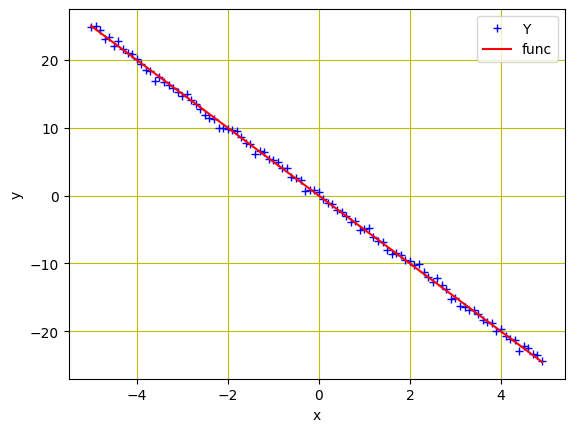

In [47]:
# Plot and visualizing the data points in blue
plt.plot(X.numpy(), Y.numpy(), 'b+', label='Y')
plt.plot(X.numpy(), func.numpy(), 'r', label='func')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid('True', color='y')
plt.show()

In [48]:
# defining the function for forward pass for prediction
def forward(x):
    return w * x + b

In [49]:
# evaluating data points with Mean Square Error (MSE)
def criterion(y_pred, y):
    return torch.mean((y_pred - y) ** 2)

In [50]:
# model parameters
w = torch.tensor(-10.0, requires_grad=True)
b = torch.tensor(-20.0, requires_grad=True)

In [51]:
# training config and data
step_size = 0.1
loss_BGD = []
n_iter = 20

Batch gradient descent implementation

In [52]:
for i in range (n_iter):
    # making predictions with forward pass
    Y_pred = forward(X)
    # calculating the loss between original and predicted data points
    loss = criterion(Y_pred, Y)
    # storing the calculated loss in a list
    loss_BGD.append(loss.item())
    # backward pass for computing the gradients of the loss w.r.t to learnable parameters
    loss.backward()
    # updateing the parameters after each iteration
    w.data = w.data - step_size * w.grad.data
    b.data = b.data - step_size * b.grad.data
    # zeroing gradients after each iteration
    w.grad.data.zero_()
    b.grad.data.zero_()
    # priting the values for understanding
    print('{}, \t{}, \t{}, \t{}'.format(i, loss.item(), w.item(), b.item()))

0, 	598.895263671875, 	-1.8458261489868164, 	-16.05301284790039
1, 	344.7617492675781, 	-7.245190143585205, 	-12.813881874084473
2, 	203.54295349121094, 	-3.611423969268799, 	-10.276570320129395
3, 	122.69430541992188, 	-6.009772300720215, 	-8.210383415222168
4, 	75.19047546386719, 	-4.3894124031066895, 	-6.581417560577393
5, 	46.673194885253906, 	-5.4539031982421875, 	-5.262041091918945
6, 	29.260183334350586, 	-4.730693817138672, 	-4.217185020446777
7, 	18.488250732421875, 	-5.202625751495361, 	-3.374068021774292
8, 	11.759591102600098, 	-4.879416465759277, 	-2.704293727874756
9, 	7.5266337394714355, 	-5.088298797607422, 	-2.1652421951293945
10, 	4.850057125091553, 	-4.943583965301514, 	-1.736089825630188
11, 	3.151430606842041, 	-5.0358171463012695, 	-1.3913207054138184
12, 	2.0706558227539062, 	-4.970849990844727, 	-1.1164277791976929
13, 	1.3817471265792847, 	-5.011434078216553, 	-0.8958637714385986
14, 	0.9420635104179382, 	-4.98215913772583, 	-0.7198183536529541
15, 	0.661192953

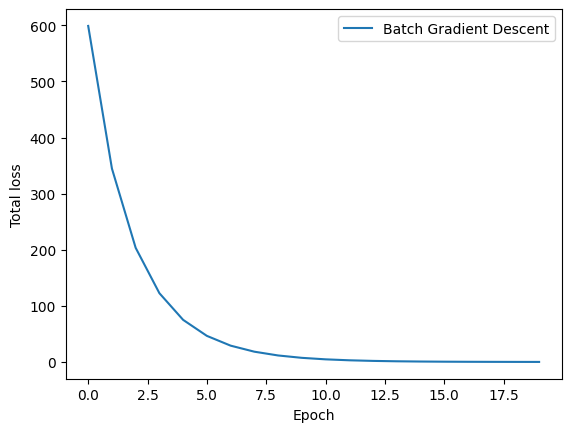

In [53]:
plt.plot(loss_BGD, label="Batch Gradient Descent")
plt.xlabel('Epoch')
plt.ylabel('Total loss')
plt.legend()
plt.show()

Stochastic gradient descent

In [54]:
w = torch.tensor(-10.0, requires_grad=True)
b = torch.tensor(-20.0, requires_grad=True)

In [55]:
step_size = 0.1
loss_SGD = []
n_iter = 20

In [56]:
for i in range(n_iter):  
    # calculating true loss and storing it
    Y_pred = forward(X)
    # store the loss in the list
    loss_SGD.append(criterion(Y_pred, Y).tolist())
 
    for x, y in zip(X, Y):
      # making a pridiction in forward pass
      y_hat = forward(x)
      # calculating the loss between original and predicted data points
      loss = criterion(y_hat, y)
      # backward pass for computing the gradients of the loss w.r.t to learnable parameters
      loss.backward()
      # updateing the parameters after each iteration
      w.data = w.data - step_size * w.grad.data
      b.data = b.data - step_size * b.grad.data
      # zeroing gradients after each iteration
      w.grad.data.zero_()
      b.grad.data.zero_()
      # priting the values for understanding
      print('{}, \t{}, \t{}, \t{}'.format(i, loss.item(), w.item(), b.item()))

0, 	26.04707908630371, 	-4.896366119384766, 	-21.020727157592773
0, 	483.7146301269531, 	-26.450010299682617, 	-16.622024536132812
0, 	7380.63232421875, 	56.02417755126953, 	-33.80414581298828
0, 	102532.3828125, 	-244.97018432617188, 	30.237213134765625
0, 	1285451.875, 	798.1053466796875, 	-196.51832580566406
0, 	14516738.0, 	-2630.97021484375, 	565.4984741210938
0, 	146868480.0, 	8033.68896484375, 	-1858.28759765625
0, 	1326760960.0, 	-23291.580078125, 	5426.65869140625
0, 	10656486400.0, 	63421.8359375, 	-15219.39453125
0, 	75773468672.0, 	-162299.40625, 	39834.5703125
0, 	474737606656.0, 	388910.21875, 	-97967.8515625
0, 	2607375974400.0, 	-870584.625, 	224979.59375
0, 	12483376971776.0, 	1814633.875, 	-481656.84375
0, 	51779832119296.0, 	-3510273.0, 	957507.25
0, 	184809674506240.0, 	6277746.0, 	-1761387.25
0, 	563279793487872.0, 	-10335715.0, 	2985316.25
0, 	1453647653240832.0, 	15590465.0, 	-4640030.0
0, 	3145929326592000.0, 	-21428004.0, 	6577687.0
0, 	5647114805706752.0, 	266

12, 	3.3260477920396465e+30, 	-494725941428224.0, 	173838365097984.0
12, 	2.4307026718074893e+30, 	378353936760832.0, 	-137975857938432.0
12, 	1.3445133482606903e+30, 	-247793104977920.0, 	93930448224256.0
12, 	5.449282244524363e+29, 	136067013410816.0, 	-53708062720000.0
12, 	1.5513797476941397e+29, 	-60870776324096.0, 	25067056529408.0
12, 	2.9294688099718453e+28, 	21284540907520.0, 	-9164325650432.0
12, 	3.377791276330396e+27, 	-5450093297664.0, 	2459427667968.0
12, 	2.0879187087501114e+26, 	907744378880.0, 	-430498906112.0
12, 	5.46045703028616e+24, 	-73695690752.0, 	36853514240.0
12, 	3.3946174925280893e+22, 	2252800.0, 	4538368.0
12, 	66584051712.0, 	2350854.75, 	4486760.0
12, 	65133166592.0, 	2442731.0, 	4435717.5
12, 	80126590976.0, 	2538973.5, 	4379104.0
12, 	100323573760.0, 	2640330.0, 	4315756.0
12, 	126205001728.0, 	2746906.0, 	4244705.5
12, 	159225757696.0, 	2858634.75, 	4164899.25
12, 	201302638592.0, 	2975288.25, 	4075165.75
12, 	254836703232.0, 	3096443.5, 	3974203.0
12

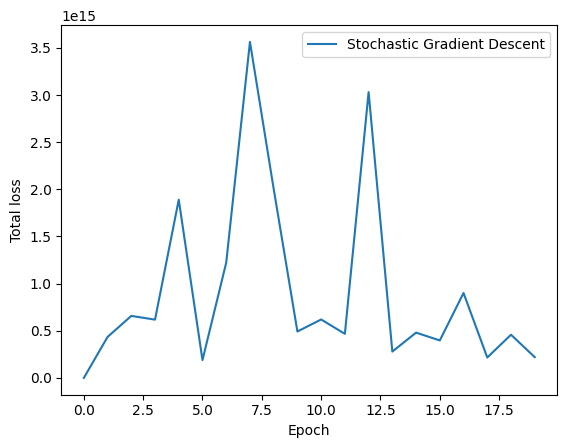

In [57]:
plt.plot(loss_SGD,label="Stochastic Gradient Descent")
plt.xlabel('Epoch')
plt.ylabel('Total loss')
plt.legend()
plt.show()

## Simple Multilayer Perceptron for MNIST

In [58]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

In [59]:
# Transformations applied on each image => first make them a tensor, then normalize them with mean 0 and std 1
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.2861,), (0.3530,))])

Next we'll load the MNIST data. First time we may have to download the data, which can take a while.

Note that we are here using the MNIST test data for validation, instead of for testing the final model.

In [60]:
train_dataset = FashionMNIST('../datasets', 
                               train=True, 
                               download=True, 
                               transform=transform)

validation_dataset = FashionMNIST('../datasets', 
                                    train=False, 
                                    transform=transform)

In [61]:
batch_size = 32

train_loader = DataLoader(dataset=train_dataset, shuffle=True, batch_size=batch_size)

validation_loader = DataLoader(dataset=validation_dataset, shuffle=False)

The train and test data are provided via data loaders that provide iterators over the datasets. The first element of training data (`X_train`) is a 4th-order tensor of size (`batch_size`, 1, 28, 28), i.e. it consists of a batch of images of size 1x28x28 pixels. `y_train` is a vector containing the correct classes ("0", "1", ..., "9") for each training digit.

And the first training images.

X_train: torch.Size([32, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor


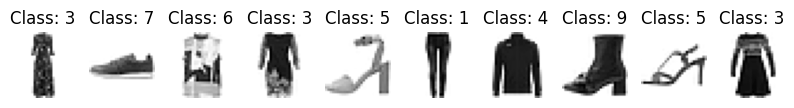

In [62]:
for (X_train, y_train) in train_loader:
    print('X_train:', X_train.size(), 'type:', X_train.type())
    print('y_train:', y_train.size(), 'type:', y_train.type())

    pltsize = 1
    plt.figure(figsize=(10 * pltsize, pltsize))

    for i in range(10):
        plt.subplot(1, 10, i + 1)
        plt.axis('off')
        plt.imshow(X_train[i, :, :, :].numpy().reshape(28, 28), cmap="gray_r")
        plt.title('Class: ' + str(y_train[i].item()))

    break

Let's define the network as a Python class. We have to write the `__init__()` and `forward()` methods, and PyTorch will automatically generate a `backward()` method for computing the gradients for the backward pass.

In [63]:
class BaseNetwork(nn.Module):
    def __init__(self, act_fn, input_size=784, num_classes=10, hidden_sizes=[512, 256, 256, 128]):
        """
        Args:
            act_fn: Object of the activation function that should be used as non-linearity in the network.
            input_size: Size of the input images in pixels
            num_classes: Number of classes we want to predict
            hidden_sizes: A list of integers specifying the hidden layer sizes in the NN
        """
        super().__init__()

        # Create the network based on the specified hidden sizes
        layers = []
        layer_sizes = [input_size] + hidden_sizes
        for layer_index in range(1, len(layer_sizes)):
            layers += [nn.Linear(layer_sizes[layer_index - 1], layer_sizes[layer_index]), act_fn]
        layers += [nn.Linear(layer_sizes[-1], num_classes)]
        # A module list registers a list of modules as submodules (e.g. for parameters)
        self.layers = nn.ModuleList(layers)

        self.config = {
            "act_fn": act_fn.__class__.__name__,
            "input_size": input_size,
            "num_classes": num_classes,
            "hidden_sizes": hidden_sizes,
        }

    def forward(self, x):
        x = x.view(x.size(0), -1)
        for layer in self.layers:
            x = layer(x)
        return x

In [64]:
model = BaseNetwork(act_fn=nn.ReLU()).to(device)

Finally, we define an optimizer to update the model parameters based on the computed gradients. We select *stochastic gradient descent (with momentum)* as the optimization algorithm, and set *learning rate* to 0.01. Note that there are [several different options](http://pytorch.org/docs/optim.html#algorithms) for the optimizer in PyTorch that we could use instead of *SGD*.

In [65]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [66]:
criterion = nn.CrossEntropyLoss()

In [67]:
model

BaseNetwork(
  (layers): ModuleList(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=256, bias=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=128, bias=True)
    (7): ReLU()
    (8): Linear(in_features=128, out_features=10, bias=True)
  )
)

Let's now define functions to `train()` and `validate()` the model.

In [68]:
def train(epoch, log_interval=200):
    # Set model to training mode
    model.train()
    
    # Loop over each batch from the training set
    for batch_idx, (data, target) in enumerate(train_loader):
        # Copy data to GPU if needed
        data = data.to(device)
        target = target.to(device)

        # Zero gradient buffers
        optimizer.zero_grad() 
        
        # Pass data through the network
        output = model(data)

        # Calculate loss
        loss = criterion(output, target)

        # Backpropagate
        loss.backward()
        
        # Update weights
        optimizer.step()
        
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data.item()))

In [69]:
def validate(loss_vector, accuracy_vector):
    model.eval()
    val_loss, correct = 0, 0
    for data, target in validation_loader:
        data = data.to(device)
        target = target.to(device)
        output = model(data)
        val_loss += criterion(output, target).data.item()
        pred = output.data.max(1)[1] # get the index of the max log-probability
        correct += pred.eq(target.data).cpu().sum()

    val_loss /= len(validation_loader)
    loss_vector.append(val_loss)

    accuracy = 100. * correct.to(torch.float32) / len(validation_loader.dataset)
    accuracy_vector.append(accuracy)
    
    print('\nValidation set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        val_loss, correct, len(validation_loader.dataset), accuracy))

Now we are ready to train our model using the `train()` function. An epoch means one pass through the whole training data. After each epoch, we evaluate the model using `validate()`.

In [70]:
%%time
epochs = 10

lossv, accv = [], []
for epoch in range(1, epochs + 1):
    train(epoch)
    validate(lossv, accv)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.313662
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.021503
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.967474
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.638444
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.524928
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.422411
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.357612
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.265304
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.812290
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.418768

Validation set: Average loss: 0.5044, Accuracy: 8089/10000 (81%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.608925
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.386503
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.307697
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.260164
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.350549
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.463355
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.126999
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.252051
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.58

Let's now visualize how the training progressed.
* *Loss* is a function of the difference of the network output and the target values. We are minimizing the loss function during training so it should decrease over time.
* *Accuracy* is the classification accuracy for the test data.

Text(0.5, 1.0, 'validation loss')

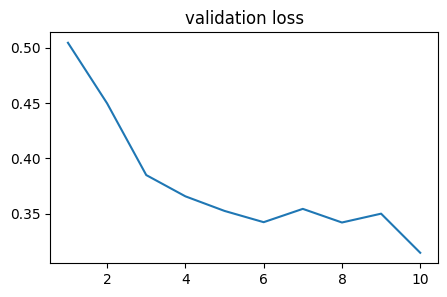

In [71]:
plt.figure(figsize=(5,3))
plt.plot(np.arange(1,epochs+1), lossv)
plt.title('validation loss')

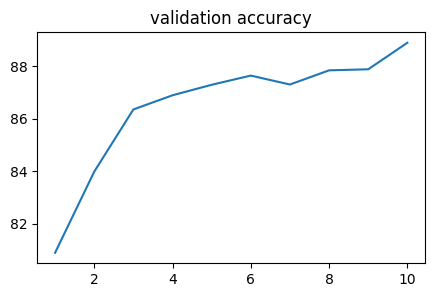

In [72]:
plt.figure(figsize=(5,3))
plt.plot(np.arange(1,epochs+1), accv)
plt.title('validation accuracy');